In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import model_selection
from sklearn.svm import SVR
from sklearn.svm import SVC


from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

## Data Exploring

In [58]:
# Import Data (From Kaggle :  "https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge")

df = pd.read_csv("car_price_prediction.csv")

In [59]:
# Explore Data
# 1. ID doesn't use
# 2. 'Levy' has unlogic value '-'
# 3. 'Mileage', 'Engine volume' can change to number

df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [60]:
# Explore Data information
# 1. Data has number and object type 
# 2. Non-null data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [61]:
# Explore statistic of Data
# 1. Has outlier (eg. max value of Airbags > 3std of Airbags)

df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [62]:
# Explore duplicates data
# 1. There are 313 duplicates in data

df.duplicated().sum()

313

In [63]:
# 'Levy' has unlogic value '-'

df['Levy'].value_counts()

-       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

In [64]:
# 'Mileage' need to remove 'km'

df['Mileage'].value_counts()

0 km         721
200000 km    183
150000 km    161
160000 km    120
100000 km    119
            ... 
63083 km       1
28750 km       1
25077 km       1
77452 km       1
186923 km      1
Name: Mileage, Length: 7687, dtype: int64

In [65]:
# 'Engine volume' some value has a not numeric

df['Engine volume'].value_counts() 

2            3916
2.5          2277
1.8          1760
1.6          1462
1.5          1321
             ... 
6.8             1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: Engine volume, Length: 107, dtype: int64

In [66]:
# 04-May should be 4-5
# 02-Mar should be 2-3

df['Doors'].value_counts()

04-May    18332
02-Mar      777
>5          128
Name: Doors, dtype: int64

## Data Cleaning

In [67]:
# Drop ID feature

df.drop(columns=["ID"], inplace=True)

In [68]:
# 1. Convert 'Levy' column to numeric (nan if error)

df['Levy']= pd.to_numeric(df['Levy'], errors='coerce')

In [69]:
# Remove unnumberic in data from 'Mileage' and 'Engine volume' column

df['Mileage'] = [float(value.split(' ')[0]) for value in df['Mileage']]
df['Engine volume'] = [float(value.split(' ')[0]) for value in df['Engine volume']]

In [70]:
# Convert (02-Mar to 2-3) and (04-May to 4-5)

df['Doors'].replace({'02-Mar': '2-3', '04-May': '4-5'}, inplace=True)

In [71]:
# Drop Duplicates

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [72]:
df = df[df['Price'] > 500]

In [73]:
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)
df

C:\Users\nuch2\AppData\Local\Temp\ipykernel_23456\3255509591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['index'], inplace=True)


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4-5,Left wheel,Silver,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8
2,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4-5,Right-hand drive,Black,2
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4-5,Left wheel,White,0
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4-5,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14794,8781,1107.0,OPEL,Combo,2007,Goods wagon,No,Diesel,1.7,236000.0,4.0,Manual,Front,4-5,Left wheel,Beige,4
14795,7840,NaN,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3.0,220000.0,6.0,Tiptronic,Rear,4-5,Right-hand drive,White,0
14796,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,2-3,Left wheel,Silver,5
14797,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,4-5,Left wheel,Red,8


In [74]:
# Explore data
# 1. Levy has null

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14799 entries, 0 to 14798
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             14799 non-null  int64  
 1   Levy              9461 non-null   float64
 2   Manufacturer      14799 non-null  object 
 3   Model             14799 non-null  object 
 4   Prod. year        14799 non-null  int64  
 5   Category          14799 non-null  object 
 6   Leather interior  14799 non-null  object 
 7   Fuel type         14799 non-null  object 
 8   Engine volume     14799 non-null  float64
 9   Mileage           14799 non-null  float64
 10  Cylinders         14799 non-null  float64
 11  Gear box type     14799 non-null  object 
 12  Drive wheels      14799 non-null  object 
 13  Doors             14799 non-null  object 
 14  Wheel             14799 non-null  object 
 15  Color             14799 non-null  object 
 16  Airbags           14799 non-null  int64 

<AxesSubplot: >

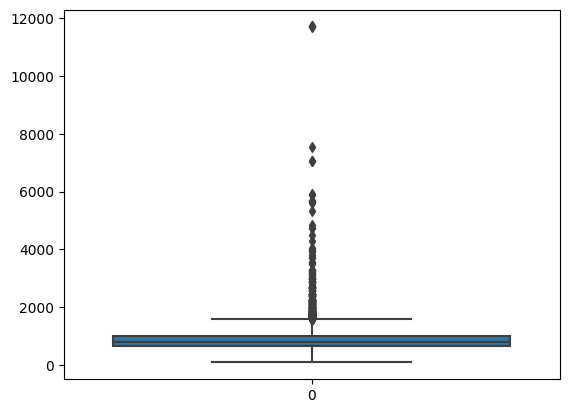

In [75]:
# Explore Levy

sns.boxplot(df['Levy'])

In [76]:
# Decition to fillna of 'Levy' with Median

df['Levy'].fillna(df['Levy'].median(), inplace=True)


C:\Users\nuch2\AppData\Local\Temp\ipykernel_23456\1007848275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Levy'].fillna(df['Levy'].median(), inplace=True)


In [77]:
# Explore statistic of data
# 1. Has outlier (eg. max value of Airbags > 3std of Airbags)

df.describe()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,1.479900e+04,14799.00000,14799.000000,14799.000000,1.479900e+04,14799.000000,14799.000000
mean,2.153406e+04,841.23157,2010.490844,2.207203,1.720727e+06,4.471789,6.448206
std,2.170679e+05,370.09412,5.954657,0.798232,5.148377e+07,1.127318,3.997651
min,5.490000e+02,87.00000,1943.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,8.500000e+03,738.00000,2008.000000,1.700000,6.689550e+04,4.000000,4.000000
50%,1.536700e+04,779.00000,2012.000000,2.000000,1.203450e+05,4.000000,5.000000
75%,2.412300e+04,862.00000,2014.000000,2.500000,1.800000e+05,4.000000,10.000000
max,2.630750e+07,11714.00000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14799 entries, 0 to 14798
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             14799 non-null  int64  
 1   Levy              14799 non-null  float64
 2   Manufacturer      14799 non-null  object 
 3   Model             14799 non-null  object 
 4   Prod. year        14799 non-null  int64  
 5   Category          14799 non-null  object 
 6   Leather interior  14799 non-null  object 
 7   Fuel type         14799 non-null  object 
 8   Engine volume     14799 non-null  float64
 9   Mileage           14799 non-null  float64
 10  Cylinders         14799 non-null  float64
 11  Gear box type     14799 non-null  object 
 12  Drive wheels      14799 non-null  object 
 13  Doors             14799 non-null  object 
 14  Wheel             14799 non-null  object 
 15  Color             14799 non-null  object 
 16  Airbags           14799 non-null  int64 

In [79]:
# def handling_outliers(data, columns):
#     for col in columns:
#         q1 = data[col].quantile(0.25)
#         q3 = data[col].quantile(0.75)
#         iqr = q3 - q1
#         lower_bound = q1 - (1.5 * iqr)
#         upper_bound = q3 + (1.5 * iqr)
#         for i in range(df.shape[0]):
#             if data[col][i] < lower_bound:
#                 data[col][i] = lower_bound
#             elif data[col][i] > upper_bound:
#                 data[col][i] = upper_bound
#             else:
#                 continue
#     return data
# def get_continus_columns(data):
#     obj = list(data.select_dtypes('object').columns)
#     lst = list(data.columns)
#     for col in obj:
#         lst.remove(col)
#     return lst


In [80]:
# print(get_continus_columns(df))

In [81]:
# Remove outlier by 3std process

outlier_features = ["Price","Levy","Prod. year","Engine volume","Mileage","Cylinders", "Airbags"]
temp = df
for feature in outlier_features:
  q1 = df[feature].quantile(0.25)
  q3 = df[feature].quantile(0.75)
  IQR = q3 - q1
  lower_bound = q1 - (1.5 * IQR)
  upper_bound = q3 + (1.5 * IQR)

  for i in range(df.shape[0]):
          if temp[feature][i] < lower_bound:
              temp[feature][i] = lower_bound
          elif temp[feature][i] > upper_bound:
              temp[feature][i] = upper_bound

# for feature in outlier_features:
#   q1 = df[feature].quantile(0.25)
#   q3 = df[feature].quantile(0.75)
#   IQR = q3 - q1

#   df = df[df[feature] <= q3 + (1.5 * IQR)]
#   df = df[df[feature] >= q1 - (1.5 * IQR)]

C:\Users\nuch2\AppData\Local\Temp\ipykernel_23456\3521294896.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[feature][i] = upper_bound
C:\Users\nuch2\AppData\Local\Temp\ipykernel_23456\3521294896.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[feature][i] = lower_bound


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14799 entries, 0 to 14798
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             14799 non-null  float64
 1   Levy              14799 non-null  float64
 2   Manufacturer      14799 non-null  object 
 3   Model             14799 non-null  object 
 4   Prod. year        14799 non-null  int64  
 5   Category          14799 non-null  object 
 6   Leather interior  14799 non-null  object 
 7   Fuel type         14799 non-null  object 
 8   Engine volume     14799 non-null  float64
 9   Mileage           14799 non-null  float64
 10  Cylinders         14799 non-null  float64
 11  Gear box type     14799 non-null  object 
 12  Drive wheels      14799 non-null  object 
 13  Doors             14799 non-null  object 
 14  Wheel             14799 non-null  object 
 15  Color             14799 non-null  object 
 16  Airbags           14799 non-null  int64 

In [83]:
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)
df

C:\Users\nuch2\AppData\Local\Temp\ipykernel_23456\3255509591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['index'], inplace=True)


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328.0,1048.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,4.0,Automatic,4x4,4-5,Left wheel,Silver,12
1,16621.0,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,4.0,Tiptronic,4x4,4-5,Left wheel,Black,8
2,8467.0,779.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4-5,Right-hand drive,Black,2
3,3607.0,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4-5,Left wheel,White,0
4,11726.0,552.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4-5,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14794,8781.0,1048.0,OPEL,Combo,2007,Goods wagon,No,Diesel,1.7,236000.0,4.0,Manual,Front,4-5,Left wheel,Beige,4
14795,7840.0,779.0,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3.0,220000.0,4.0,Tiptronic,Rear,4-5,Right-hand drive,White,0
14796,8467.0,779.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,2-3,Left wheel,Silver,5
14797,15681.0,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,4-5,Left wheel,Red,8


In [84]:
for col in df.select_dtypes('object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

C:\Users\nuch2\AppData\Local\Temp\ipykernel_23456\1272233547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])


In [85]:
y = df.iloc[:, 0:1]
x = df.drop(['Price', 'Color'], axis=1)
x = MinMaxScaler().fit_transform(x)
y

,Price
0,13328.0
1,16621.0
2,8467.0
3,3607.0
4,11726.0
...,...
14794,8781.0
14795,7840.0
14796,8467.0
14797,15681.0


In [86]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328.0,1048.0,32,1230,2010,4,1,2,3.5,186005.0,4.0,0,0,1,0,12,12
1,16621.0,1018.0,8,650,2011,4,0,5,3.0,192000.0,4.0,2,0,1,0,1,8
2,8467.0,779.0,21,676,2006,3,0,5,1.3,200000.0,4.0,3,1,1,1,1,2
3,3607.0,862.0,16,653,2011,4,1,2,2.5,168966.0,4.0,0,0,1,0,14,0
4,11726.0,552.0,21,676,2014,3,1,5,1.3,91901.0,4.0,0,1,1,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14794,8781.0,1048.0,42,487,2007,2,0,1,1.7,236000.0,4.0,1,1,1,0,0,4
14795,7840.0,779.0,41,1311,2003,9,1,5,3.0,220000.0,4.0,2,2,1,1,14,0
14796,8467.0,779.0,36,382,1999,1,1,0,2.0,300000.0,4.0,1,2,0,0,12,5
14797,15681.0,831.0,23,1316,2011,9,1,5,2.4,161600.0,4.0,2,1,1,0,11,8


In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)


In [88]:
y_train

,Price
7592,5802.0
14628,37633.0
3501,23521.0
2649,6586.0
7019,8781.0
...,...
3046,7213.0
9917,34497.0
4079,20005.0
2254,13172.0


In [89]:
x_train

array([[0.45766129, 0.96825397, 0.81609195, ..., 0.5       , 0.        ,
        0.375     ],
       [0.45766129, 0.9047619 , 0.72924649, ..., 0.5       , 0.        ,
        0.5       ],
       [1.        , 0.9047619 , 0.2752235 , ..., 0.5       , 0.        ,
        0.625     ],
       ...,
       [0.        , 0.36507937, 0.399106  , ..., 0.5       , 0.        ,
        0.25      ],
       [0.68346774, 0.36507937, 0.8403576 , ..., 0.5       , 0.        ,
        0.25      ],
       [1.        , 0.57142857, 0.85887612, ..., 0.5       , 0.        ,
        0.125     ]])

## Linear Regression

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
r2 = r2_score(y_test,y_pred)
# mse = mean_squared_error(y_test,y_pred)
print(r2)

0.3744006554062086


# KFold SVR

In [ ]:
# Num_fold = 3
# Seed = 45

In [ ]:
# kfold = model_selection.KFold(n_splits=Num_fold, shuffle = True, random_state=Seed)
# Model_LM = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
# c_val = 100
# svr_lin = SVR(kernel='linear', C=c_val)
# svr_rbf = SVR(kernel='rbf', C=c_val, gamma=0.01)
# svr_poly = SVR(kernel='poly', C=c_val, degree=2)

# score_LM = model_selection.cross_val_score(Model_LM, x_train, y_train, cv=kfold)
# score_lin = model_selection.cross_val_score(svr_lin, x_train, y_train, cv=kfold)
# score_rbf = model_selection.cross_val_score(svr_rbf, x_train, y_train, cv=kfold)
# score_poly = model_selection.cross_val_score(svr_poly, x_train, y_train, cv=kfold)

In [ ]:
# # View score k-fold
# # Valication score comparison
# score = pd.DataFrame({'Linear Model':score_LM,'SVR_linear':score_lin, 'SVR_rbf': score_rbf, 'SVR_poly':score_poly})
# score_mean = pd.DataFrame({'AVG Linear Model':[score_LM.mean()],'AVG SVR_linear':[score_lin.mean()],'AVG SVR_rbf': [score_rbf.mean()], 'AVG SVC_poly': [score_poly.mean()]})

In [ ]:
# score

In [ ]:
# score_mean

# KNN

In [ ]:
# k = [1,3,5,7,9,11,13,19,25,35]


In [ ]:
rating_pctile = np.percentile(y, [75, 90])
Bean_grade = []
NSamples = [0] * 3


for value in y['Price']:
  if value < rating_pctile[0]:   # 75 percentile
    grade = 1
  elif value < rating_pctile[1]: # 90 percentile
    grade = 2
  else:
    grade = 3


  Bean_grade.append(grade)      # append grade
  NSamples[grade - 1] += 1      # Count each grade
y

In [ ]:
y["Price_grade"] = Bean_grade
y.drop(["Price"],axis =1,inplace= True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)


In [ ]:
KNN_scores = []
for neighbor in k:
  # Model Training
  modelKNN = KNeighborsClassifier(n_neighbors=neighbor,p=2)
  modelKNN.fit(x_train,y_train)

  # Model Testing
  y_pred = modelKNN.predict(x_test)
  KNNScore = accuracy_score(y_test, y_pred)

  KNN_scores.append(KNNScore)

In [ ]:
print(KNN_scores)

In [ ]:
# Model Training
modelKNN = KNeighborsClassifier(n_neighbors=5,p=2)
modelKNN.fit(x_train,y_train)

# Model Testing
y_pred = modelKNN.predict(x_test)
KNNScore = accuracy_score(y_test, y_pred)

print('KNN SCORE: ', KNNScore)

print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))
print('Classification Report: ')
print(classification_report(y_test, y_pred))

# Decision Tree

In [ ]:
ASM_function = ['entropy', 'gini']
maxD = [4, 5, 6, None]

In [ ]:
for asm in ASM_function:
  for depth in maxD:
    # Model Training
    ModelDT = DecisionTreeClassifier(criterion=asm,splitter='best',max_depth=depth)
    ModelDT.fit(x_train,y_train)

    # Model testing 
    y_pred = ModelDT.predict(x_test)
    DTScore = accuracy_score(y_test,y_pred)
    
    print("DTScore:", DTScore, "ASM:", asm, "Depth", depth)

In [ ]:
ModelDT = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=None)
ModelDT.fit(x_train,y_train)

# Model testing 
y_pred = ModelDT.predict(x_test)
DTScore = accuracy_score(y_test,y_pred)

print('Confusion Matrix: ')
print(confusion_matrix(y_test,y_pred))
print('Classifiction Report: ')
print(classification_report(y_test,y_pred))

# Random Forrest

In [ ]:
# Random Forest parameter

ASM_function = ['entropy','gini']
nEstimator = 5
nJob = 8
rState =10

In [ ]:
RF_scores = []
for asm in ASM_function:    
    # Model Training 
    RandomF = RandomForestClassifier(criterion=asm,n_estimators=nEstimator,n_jobs=nJob,random_state=rState)
    RandomF.fit(x_train,y_train)    

    # Model Testing
    y_pred = RandomF.predict(x_test)
    RFScore = accuracy_score(y_test,y_pred.ravel())
    
    RF_scores.append(RFScore)
    print(RFScore)

In [ ]:
# Print confusion matrix and classification report for best k

# Model Training 
RandomF = RandomForestClassifier(criterion='entropy',n_estimators=nEstimator,n_jobs=nJob,random_state=rState)
RandomF.fit(x_train,y_train)    

# Model Testing
y_pred = RandomF.predict(x_test)
RFScore = accuracy_score(y_test,y_pred.ravel())

print('Confusion Matrix: ')
print(confusion_matrix(y_test,y_pred))
print('Classification Report: ')
print(classification_report(y_test,y_pred))

# SVM Model

In [ ]:
x = df_feature
y = df_label
seed = 50
x_train,x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3, random_state=seed)

In [ ]:
c_val = 100 
gmm = 0.1
d = 2

In [ ]:
svc_rbf = SVC(kernel='rbf', C=c_val, gamma=gmm)
svc_poly = SVC(kernel='poly', C=c_val, degree=d)

In [ ]:
svc_rbf_pred = svc_rbf.fit(x_train, y_train)
svc_poly = svc_poly.fit(x_train, y_train)

In [ ]:
svc_rbf_pred = svc_rbf.predict(x_test)
svc_poly_pred = svc_poly.predict(x_test)

In [ ]:
print('----- Confusion matrix of SVC Rbf -----')
print(confusion_matrix(y_test,svc_rbf_pred))
print('----- Confusion matrix of SVC Poly -----')
print(confusion_matrix(y_test,svc_poly_pred))

In [ ]:
print('----- Classification matrix of SVC Rbf -----')
print(classification_report(y_test,svc_rbf_pred))
print('----- Classification matrix of SVC Poly -----')
print(classification_report(y_test,svc_poly_pred))